         Urun  Kategori  Fiyat  Satis_Adedi
0     Monitör     Ekran   4226            2
1       Mouse  Aksesuar    365            2
2  USB Bellek  Aksesuar    277            1
3      Klavye  Aksesuar    597            4
4    Kulaklık  Aksesuar   1744            2


 --- En Çok Satan Ürünler --- 


Urun
Tablet              359
Monitör             351
Kulaklık            322
USB Bellek          304
Yazıcı              295
Klavye              293
Laptop              288
Telefon             274
Mouse               266
Oyun Bilgisayarı    253
Name: Satis_Adedi, dtype: int64



--- Fırsat Bilgisayarları ---



       Urun    Kategori  Fiyat  Satis_Adedi
7    Tablet  Bilgisayar   3188            4
18   Laptop  Bilgisayar  13019            5
19   Tablet  Bilgisayar   3382            4
51   Tablet  Bilgisayar   7303            5
56   Laptop  Bilgisayar  14994            5
..      ...         ...    ...          ...
944  Tablet  Bilgisayar   7350            5
960  Laptop  Bilgisayar  14096      

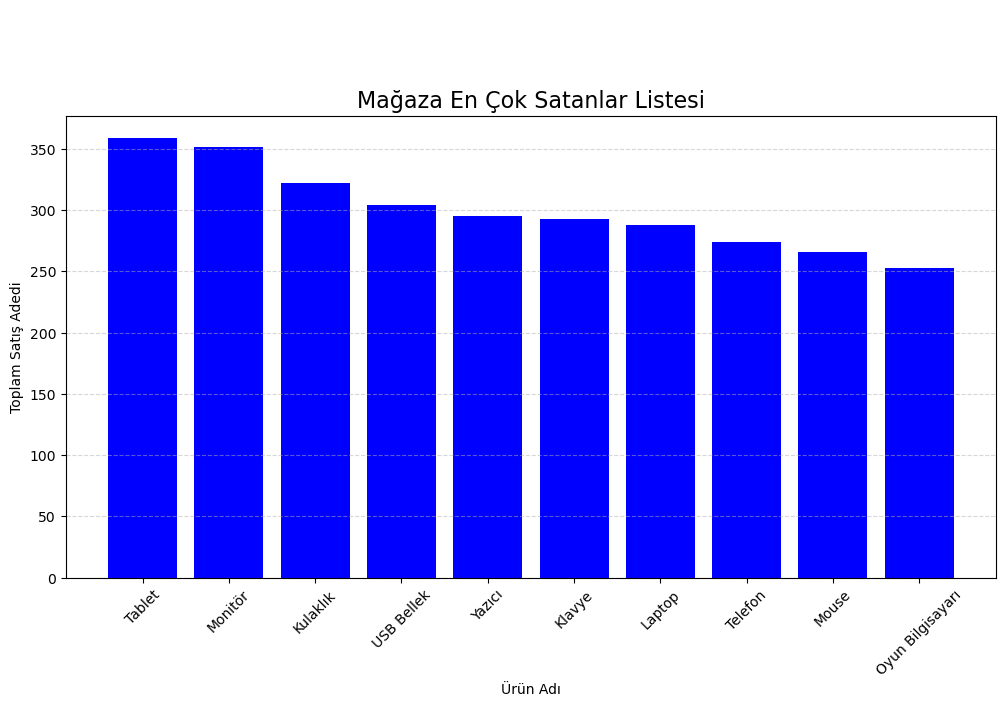

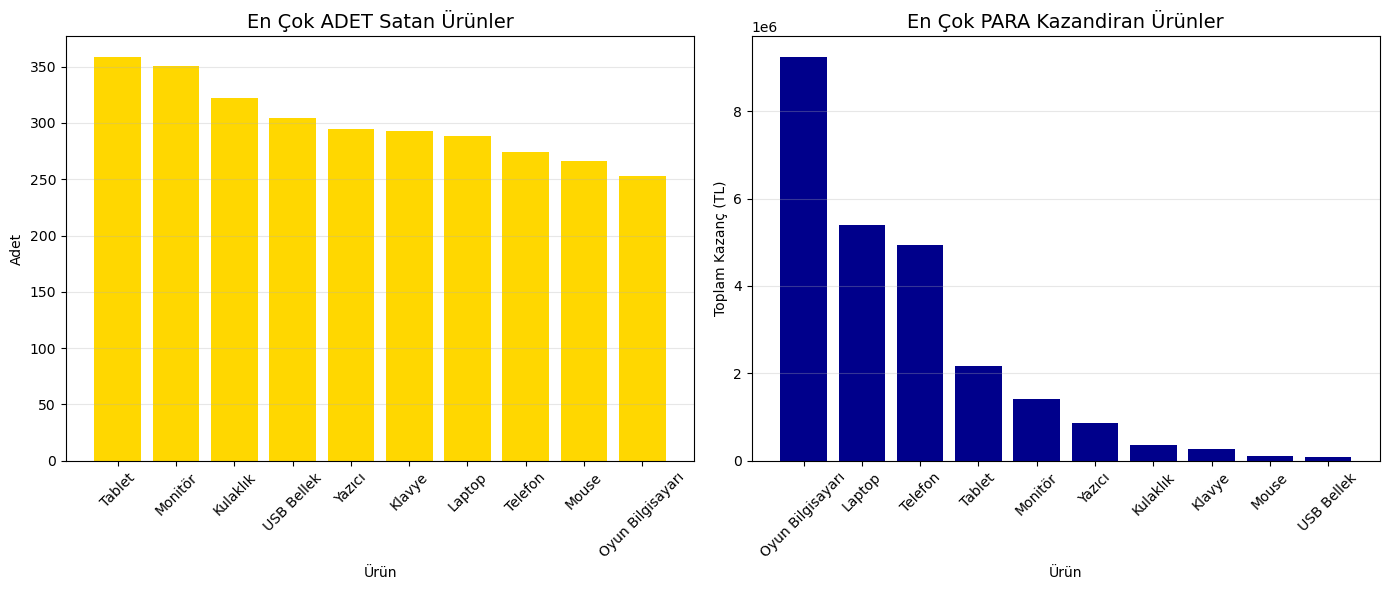

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Belge içe aktar

df = pd.read_excel("buyuk_magaza_verisi.xlsx")
print(df.head())  # Doğru veriyi aldık mı testi


# Sırala ve bastır 

dfGrouped = df.groupby("Urun")["Satis_Adedi"].sum().sort_values(ascending=False)

print("\n\n --- En Çok Satan Ürünler --- \n\n")

print(dfGrouped)


# Karmaşık Filtreleme

# 1. Adım: Karmaşık filtreyi kuruyoruz
# Parantez kullanmak ZORUNLUDUR! (şart 1) & (şart 2) & (şart 3)
filtre = (df["Kategori"] == "Bilgisayar") & (df["Fiyat"] < 20000) & (df["Satis_Adedi"] > 3)

# 2. Adım: Filtreyi uygula
firsat_urunleri = df[filtre]

print("\n\n\n--- Fırsat Bilgisayarları ---\n\n\n")
print(firsat_urunleri)


# Grafikleştirme

plt.figure(figsize=(12, 6))
plt.title("\n\n\nMağaza En Çok Satanlar Listesi", fontsize=16)
plt.xlabel("Ürün Adı")
plt.ylabel("Toplam Satış Adedi")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.bar(dfGrouped.index, dfGrouped.values, color="blue")


plt.show()

# Adet ve para analizi

df["Toplam_Kazanc"] = df["Fiyat"] * df["Satis_Adedi"]

adet_analizi = df.groupby("Urun")["Satis_Adedi"].sum().sort_values(ascending=False)

para_analizi = df.groupby("Urun")["Toplam_Kazanc"].sum().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- SOL GRAFİK (ADET) ---
ax1.bar(adet_analizi.index, adet_analizi.values, color="gold")
ax1.set_title("En Çok ADET Satan Ürünler", fontsize=14)
ax1.set_xlabel("Ürün")
ax1.set_ylabel("Adet")
ax1.tick_params(axis='x', rotation=45) # Yazıları eğik yap
ax1.grid(axis='y', alpha=0.3)

# --- SAĞ GRAFİK (PARA) ---
ax2.bar(para_analizi.index, para_analizi.values, color="darkblue")
ax2.set_title("En Çok PARA Kazandiran Ürünler", fontsize=14)
ax2.set_xlabel("Ürün")
ax2.set_ylabel("Toplam Kazanç (TL)")
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()